## The Spark Foundation
### Data Science and Business Analytics Internship
#### Task #1 : Prediction using Supervised ML
#### Author : Surabhi Srivastava
##### Problem: Predict the percentage of a student based on the number of study hours. What will be the predicted score if a student studies for 9.25 hrs/day?
##### Dataset : http://bit.ly/w-data

#### 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### 2. Attaching Dataset

In [2]:
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(path)

In [9]:
## prints whole data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
## prints first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
## prints last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
## information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
## statistical terms or description of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data Analysis and Visualization

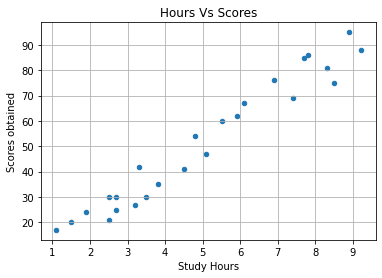

In [15]:
data.plot.scatter(x='Hours',y='Scores')
plt.xlabel("Study Hours")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

<AxesSubplot:xlabel='Hours'>

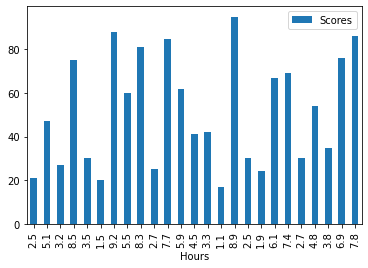

In [19]:
data.plot.bar(x='Hours',y='Scores')

### From here, we can conclude that on increasing study hours, scores also increases, now we will train and test our data and build a prediction model of it

In [28]:
x = data['Hours']
y = data['Scores']

x = x.values.reshape(len(x), 1)
y = y.values.reshape(len(y), 1)

In [39]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
x_train.shape

(20, 1)

In [41]:
x_test.shape

(5, 1)

In [42]:
y_train.shape

(20, 1)

In [43]:
y_test.shape

(5, 1)

### Training the algorithm

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

regressor.fit(x_train, y_train) 

LinearRegression()

In [47]:
# Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

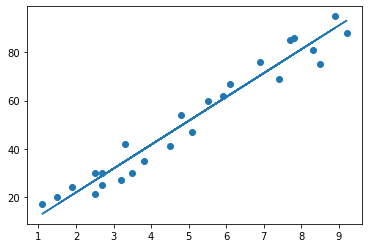

In [48]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Prediction

In [54]:
model = regressor.predict(x_test)

In [60]:
model

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [67]:
##Accuracy check
pd.DataFrame(np.c_[x_test, y_test, model], columns = ["Hours", "ActualScores", "Scores_Predicted"])

,Hours,ActualScores,Scores_Predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [71]:
regressor.score(x_test, y_test)

0.9454906892105356

### If student studies 9.25 hours predict its score

In [77]:
hours = [9.25]
pred = regressor.predict([hours])
print("Predicted scores for 9.25 hours is:", pred)

Predicted scores for 9.25 hours is: [[93.69173249]]


### Model evaluation

In [75]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
